In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Reading the democratic candidates csv file

In [2]:
Dem_df = pd.read_csv("../Data/dem_candidates.csv")


In [4]:
Dem_df = Dem_df[['Won Primary','Gender','Partisan Lean', 'Race',
       'Veteran?', 'LGBTQ?', 'Elected Official?', 'Self-Funder?', 'STEM?',
       'Obama Alum?', 'Party Support?', 'Emily Endorsed?',
       'Guns Sense Candidate?', 'Biden Endorsed?', 'Warren Endorsed? ',
       'Sanders Endorsed?', 'Our Revolution Endorsed?',
       'Justice Dems Endorsed?', 'PCCC Endorsed?', 'Indivisible Endorsed?',
       'WFP Endorsed?', 'VoteVets Endorsed?', 'No Labels Support?' ]]

# Missing Values

In [5]:
# Remove

Dem_df = Dem_df.dropna(axis=0, subset=['Won Primary'])

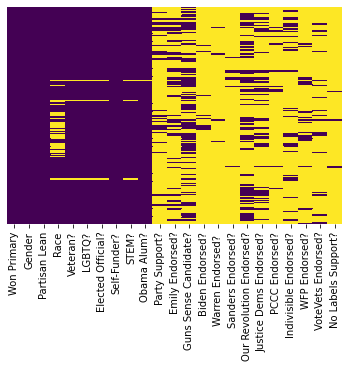

In [6]:
# Missing pattern in Risk Drivers

ax1 = sns.heatmap(Dem_df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

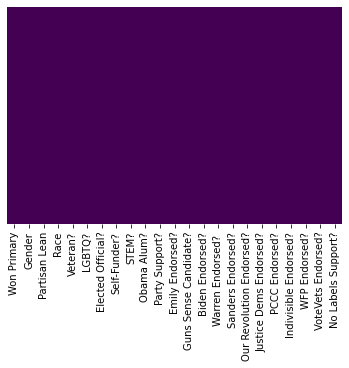

In [7]:
Dem_df2 = Dem_df.fillna('NaN')

ax2 = sns.heatmap(Dem_df2.isnull(),yticklabels=False,cbar=False,cmap='viridis')

# Dummy variable coding

In [12]:
# Retain only relevant columns

Dem_df3 = Dem_df2[['Won Primary', 'Gender','Partisan Lean', 'Elected Official?', 'Obama Alum?', 'STEM?', 'Race', 'Veteran?', 'LGBTQ?', 'Self-Funder?']]

X_cat = pd.get_dummies(Dem_df3[['Gender','Elected Official?', 'Obama Alum?', 'STEM?', 'Race', 'Veteran?', 'LGBTQ?', 'Self-Funder?']], drop_first=True)

X_num = pd.DataFrame(Dem_df2['Partisan Lean'])

X = pd.concat([X_num, X_cat], axis = 1)

# Train - Test Split

In [13]:
from sklearn.model_selection import train_test_split

y = Dem_df3['Won Primary']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

# Random Forest Model using GridSearch

In [14]:
# Create the GridSearchCV model

from sklearn.model_selection import GridSearchCV

params = {'max_leaf_nodes': list(range(2, 20)), 'max_depth': list(range(2,10)), 'min_samples_leaf' : [30], 'n_estimators': [200]}

In [15]:
from sklearn.ensemble import RandomForestClassifier

rfc = GridSearchCV(RandomForestClassifier(random_state=101), params, verbose=1, cv=3)

rfc.fit(X_train, y_train)

Fitting 3 folds for each of 144 candidates, totalling 432 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 432 out of 432 | elapsed:  1.7min finished


GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=101, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'max_leaf_nodes': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19], 'max_depth': [2, 3, 4, 5, 6, 7, 8, 9], 'min_samples_leaf': [30], 'n_estimators': [200]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=1)

In [16]:
print(rfc.best_params_)

print(rfc.best_score_)

{'max_depth': 2, 'max_leaf_nodes': 2, 'min_samples_leaf': 30, 'n_estimators': 200}
0.7065217391304348


In [23]:
# Create a random forest classifier

rfc2 = RandomForestClassifier(random_state=101, n_estimators = 200)

rfc2.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=None,
            oob_score=False, random_state=101, verbose=0, warm_start=False)

# Prediction and Evaluation of Model

In [24]:
from sklearn.metrics import classification_report,confusion_matrix

predictions = rfc2.predict(X_test)

print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

          No       0.69      0.75      0.72       160
         Yes       0.35      0.29      0.32        77

   micro avg       0.60      0.60      0.60       237
   macro avg       0.52      0.52      0.52       237
weighted avg       0.58      0.60      0.59       237

